## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [2]:
df=pd.read_csv("D:\Python\Datasets for ds\pizza_v2.csv")

In [3]:
df.head()

,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,$25,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


## Understanding the Dataset

### Data types information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_cad        129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


### SummaryStatistics

In [5]:
df.describe()

,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129,129
unique,5,17,12,12,20,6,2,2,2
top,C,$14,12 inch,chicken,classic,medium,yes,yes,yes
freq,30,18,49,29,30,41,76,86,72


### Check for unique values

In [6]:
df.nunique()

company             5
price_cad          17
diameter           12
topping            12
variant            20
size                6
extra_sauce         2
extra_cheese        2
extra_mushrooms     2
dtype: int64

### Checking for null values

In [7]:
df.isnull().sum()

company            0
price_cad          0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

## Data Cleaning and preprocessing

In [8]:
df.rename({'price_cad': 'price'}, axis = 1, inplace = 'true')
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,$25,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [9]:
df['price'] = df['price'].str.replace('$','')
df['size'] = df['size'].str.replace('reguler','regular')
df['diameter'] = df['diameter'].str.replace('inch','')
df['variant'] = df['variant'].str.replace('spicy tuna','spicy_tuna')
df['variant'] = df['variant'].str.replace('extravaganza','extra_vaganza')

C:\Users\bhava\AppData\Local\Temp\ipykernel_11032\3374863858.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','')


In [10]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,29,22,chicken,double_signature,jumbo,yes,yes,no
1,A,25,20,papperoni,double_signature,jumbo,yes,yes,no
2,A,19,16,mushrooms,double_signature,regular,yes,yes,yes
3,A,22,14,smoked_beef,double_signature,regular,yes,no,yes
4,A,30,18,mozzarella,double_signature,jumbo,yes,no,yes


In [11]:
df[['extra_sauce', 'extra_cheese', 'extra_mushrooms']] = df[['extra_sauce', 'extra_cheese', 'extra_mushrooms']].astype(bool)
df[['price']] = df[['price']].astype(int)
df[['diameter']] = df[['diameter']].astype(float)
df.dtypes

company             object
price                int32
diameter           float64
topping             object
variant             object
size                object
extra_sauce           bool
extra_cheese          bool
extra_mushrooms       bool
dtype: object

## Visualisations

12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: diameter, dtype: int64


<Axes: >

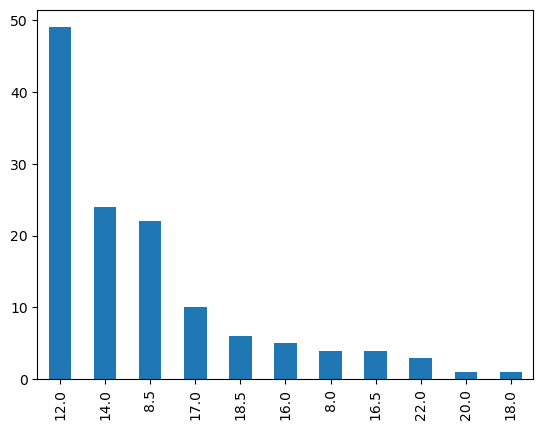

In [12]:
print(df['diameter'].value_counts())
df['diameter'].value_counts().plot.bar()

<Axes: >

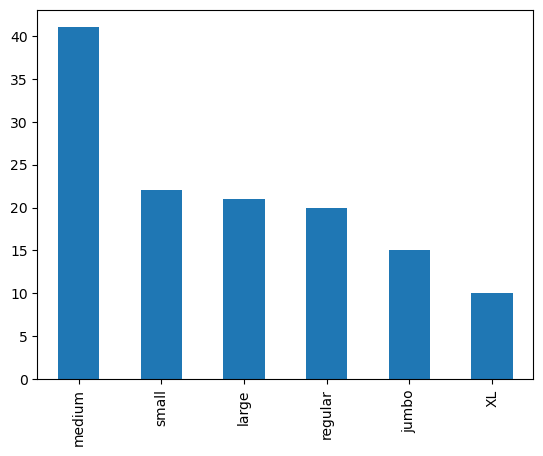

In [13]:
cnt_size=df['size'].value_counts()
df['size'].value_counts().plot.bar()


<Axes: xlabel='count', ylabel='variant'>

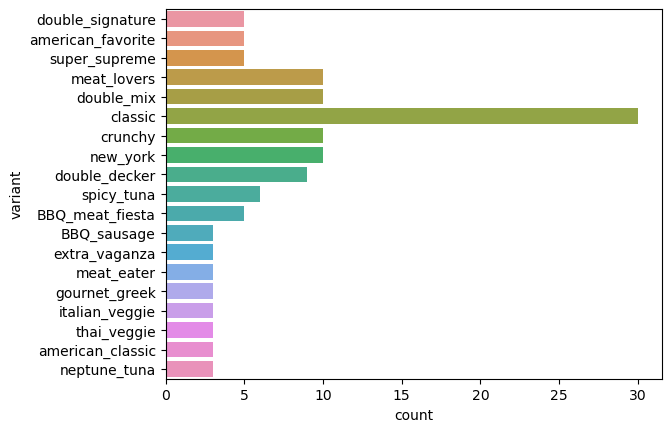

In [14]:
sns.countplot(y = df['variant'])

<Axes: xlabel='company', ylabel='price'>

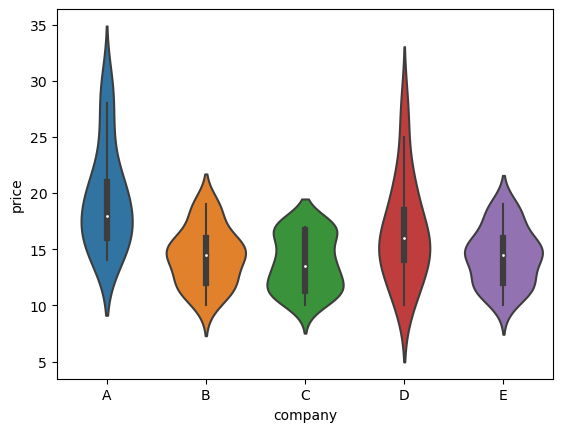

In [15]:
sns.violinplot(x = df['company'], y = df['price'])

<Axes: xlabel='price', ylabel='count'>

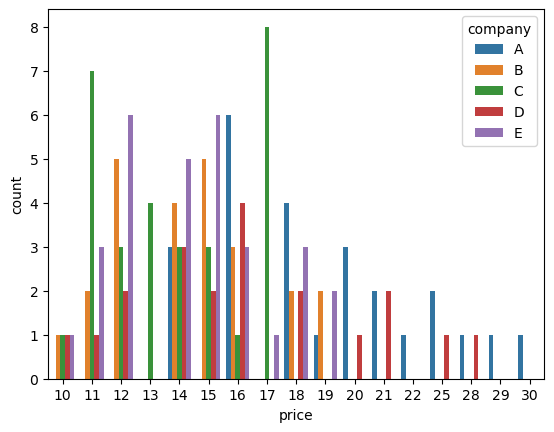

In [16]:
sns.countplot(hue = df['company'], x = df['price'])

## Encoding Categorical values

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
categorical_cols = df.select_dtypes(include=['object','bool']).columns
categorical_cols

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese',
       'extra_mushrooms'],
      dtype='object')

In [19]:
en = LabelEncoder()
for i in categorical_cols:
    df[i] = en.fit_transform(df[i])

In [20]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,29,22.0,2,8,1,0,0,0
1,0,25,20.0,7,8,1,0,0,0
2,0,19,16.0,5,8,4,0,0,0
3,0,22,14.0,9,8,4,0,0,0
4,0,30,18.0,4,8,1,0,0,0


## Split the Data

In [21]:
X = df.drop('price',axis=1)
Y = df['price']

### Standardization 

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled=scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled,Y,test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((103, 8), (103,), (26, 8), (26,))

## Model Fitting

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [25]:
res = pd.DataFrame()

lr = LinearRegression()
tree = DecisionTreeRegressor(max_depth = 4)
rf = RandomForestRegressor(max_depth = 6, n_estimators = 90, random_state = 73)
gb = GradientBoostingRegressor(max_depth = 3, n_estimators = 50, random_state = 37)
knn = KNeighborsRegressor(n_neighbors= 9)
svr=SVR()

Models = [lr,tree,rf,gb,knn,svr]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    print('Training score : {}'.format(m.score(X_train,y_train)))
    prediction = m.predict(X_test)
    print('Predictions are : {}'.format(prediction))
    r2score = r2_score(y_test,prediction)
    print('R2 score is : {}'.format(r2score))

    mae = mean_absolute_error(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mean_squared_error(y_test,prediction))
    print('MAE : {}'.format(mae))
    print('MSE : {}'.format(mse))
    print('RMSE : {}'.format(rmse))

    model_dict = {'Model Name' : model, 'R2 score':r2score,'MAE' : mae,'MSE' : mse,'RMSE' : rmse}
    res = res.append(model_dict,ignore_index=True)
    print(res)
    

Model is: LinearRegression()
Training score : 0.7688575728429711
Predictions are : [12.39563736 14.32108859 15.61885159 12.12359428 15.28183791 15.03052604
 16.67425929 13.53282642  9.03930153 14.36283264 11.62591553 16.95154011
 12.41559125 20.82414203 15.92632761 11.24519271 15.20252862 17.74368834
 17.01022332 25.42486613 15.75073503 21.14460374 14.01196483 17.26816277
 11.53556478 16.29212292]
R2 score is : 0.690307889418855
MAE : 1.8249572327213042
MSE : 6.81872392587243
RMSE : 2.611268642991837
           Model Name  R2 score       MAE       MSE      RMSE
0  LinearRegression()  0.690308  1.824957  6.818724  2.611269
Model is: DecisionTreeRegressor(max_depth=4)
Training score : 0.9125205328582009
Predictions are : [15.         13.05882353 14.28571429 10.75       15.16666667 14.83333333
 16.76190476 17.28571429 14.28571429 13.05882353 10.75       16.76190476
 10.75       20.         16.76190476 10.75       17.28571429 16.76190476
 15.16666667 28.         14.28571429 20.         13.

C:\Users\bhava\AppData\Local\Temp\ipykernel_11032\596706682.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(model_dict,ignore_index=True)
C:\Users\bhava\AppData\Local\Temp\ipykernel_11032\596706682.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(model_dict,ignore_index=True)
C:\Users\bhava\AppData\Local\Temp\ipykernel_11032\596706682.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(model_dict,ignore_index=True)
C:\Users\bhava\AppData\Local\Temp\ipykernel_11032\596706682.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(model_dict,ignore_index=True)
C:\U

## Comparing The models

In [26]:
models = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','KNeighborsRegressor','SVR']

result = pd.DataFrame({'Models':models})
result['R2 score'] = res['R2 score']
result['MAE'] = res['MAE']
result['MSE'] = res['MSE']
result['RMSE'] = res['RMSE']
result = result.sort_values(by='R2 score',ascending=False)
result

,Models,R2 score,MAE,MSE,RMSE
3,GradientBoostingRegressor,0.868928,1.100416,2.885912,1.698797
2,RandomForestRegressor,0.835031,1.234545,3.632240,1.905844
4,KNeighborsRegressor,0.720786,1.619658,6.147673,2.479450
1,DecisionTreeRegressor,0.710969,1.608032,6.363805,2.522658
0,LinearRegression,0.690308,1.824957,6.818724,2.611269
5,SVR,0.560267,2.146584,9.681943,3.111582


#### The Gradient Boosting Regresser has the highest R2 score of all the models used. 

### Adding the predicted values to the database 
 To check how weel the predicted value is calculated.

In [27]:
df1=df

In [28]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

out = pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
res = df1.merge(out,left_index=True,right_index=True)
res.head(10)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,Price_actual,Price_pred
4,0,30,18.0,4,8,1,0,0,0,30,23.147427
10,0,20,18.5,4,17,1,0,0,0,20,20.800982
11,0,18,16.0,1,17,1,0,0,0,18,16.212415
18,0,16,12.0,5,13,4,0,0,0,16,15.604046
19,0,16,12.0,4,13,4,0,0,0,16,15.479905
26,1,12,12.0,2,4,3,0,0,0,12,13.101934
27,1,14,14.0,9,4,2,0,0,0,14,15.029099
31,1,11,8.5,5,4,5,0,0,0,11,11.663160
36,1,19,12.0,9,6,3,0,0,0,19,17.770944
40,1,15,12.0,2,5,3,0,0,0,15,13.115719
